# Exploratory Data Analysis

...opportunity to compare [Altair](https://altair-viz.github.io/), [Seaborn](https://seaborn.pydata.org) and [plotly_express](https://plot.ly/python/plotly-express/) because why not.

Inspiration :
- https://www.kaggle.com/artgor/eda-and-models

## Prerequisites

In [1]:
%load_ext autoreload
%autoreload 2

In [68]:
from src.utils import printmd
from src.dataset.utils import df_empty
from src.dataset.make_dataset import Dataset
from src.features.utils import *
from src.features.build_features import *
from src.visualization.visualize import *

import numpy as np
import pandas as pd

%matplotlib inline
sns.set(style="whitegrid")

#alt.renderers.enable('notebook') # for the notebook only 

import warnings
warnings.filterwarnings("ignore")

In [3]:
ds = Dataset()
ds.load_dataset()
#build_processed_dataset(ds)

In [4]:
X = ds.X_train.reset_index()
y = ds.y_train.reset_index()['isFraud']
X_test = ds.X_test.reset_index()
X['label'] = y

## Identity information

In [5]:
print(ds.identity_cols)

['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [6]:
print(ds.identity_cols_categorical)

['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']


In [7]:
def count_identity_instances():
    df = df_empty(['col', 'train_count', 'test_count', 'type'], dtypes=[str, np.float, np.float, str])
    df['col'] = ["id_"+str(i).zfill(2) for i in range(1,39)]
    df['train_count'] = df['col'].apply(lambda col: len(X[col].unique()))
    df['test_count'] = df['col'].apply(lambda col: len(X_test[col].unique()))
    df['type'] = df['col'].apply(lambda col: X[col].dtype)
    df = df.set_index('col')
    return df
    
count_identity_instances()

,train_count,test_count,type
col,,,
id_01,78,81,float32
id_02,115656,114869,float32
id_03,25,23,float32
id_04,16,16,float32
id_05,94,91,float32
id_06,102,102,float32
id_07,85,82,float32
id_08,95,91,float32
id_09,47,39,float32


#### id_01

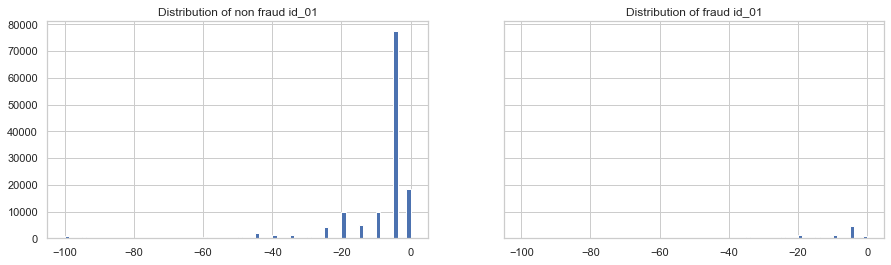

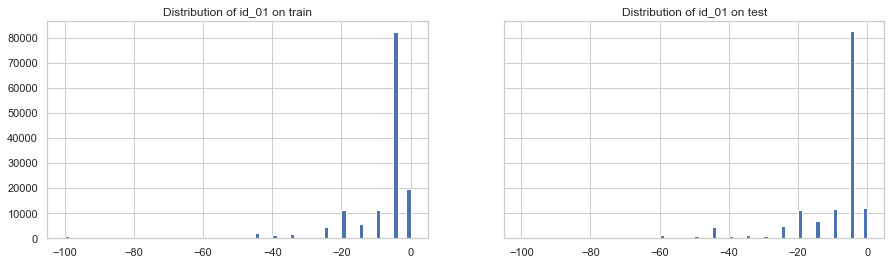

In [69]:
compare_isfraud_hist(X, 'id_01', 80)
compare_train_test_hist(X, X_test, 'id_01', 80)

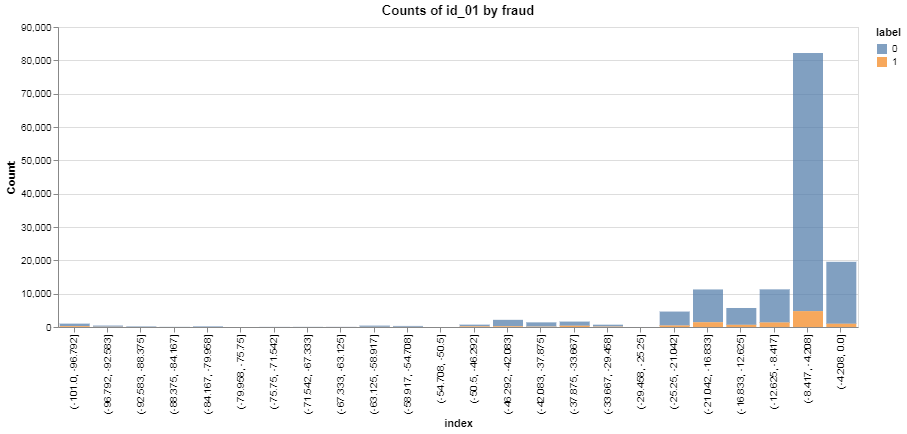

In [79]:
auto_bin(X, 'id_01', 25)#.interactive()

This looks like a `capture_day` variable. Heavily skewed towards -5 and peaks of multiple of 5, **we should be able to modulo 5 or bin this column**.

In [53]:
def bin_id_01(X):
    # Fixed 5 length : 0 =< x < 5
    return pd.cut(X['id_01'], np.arange(-100, 1, 5))

X['id_01_bins']=bin_id_01(X)
X_test['id_01_bins']=bin_id_01(X_test)

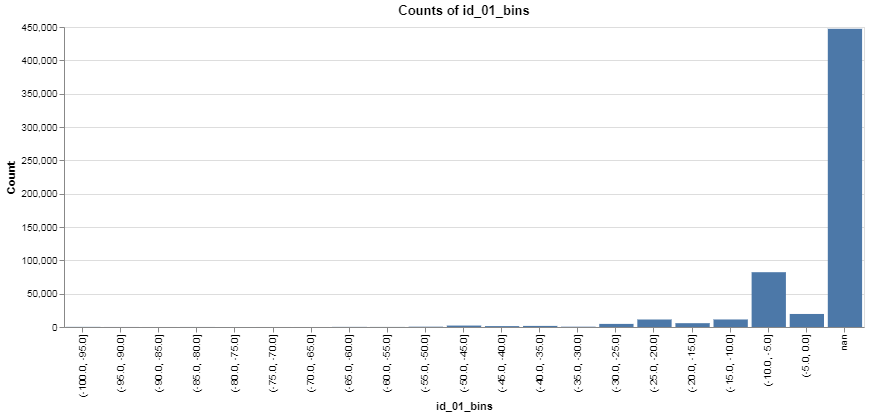

In [54]:
bins_histogram(X, 'id_01_bins', width=800)#.interactive()

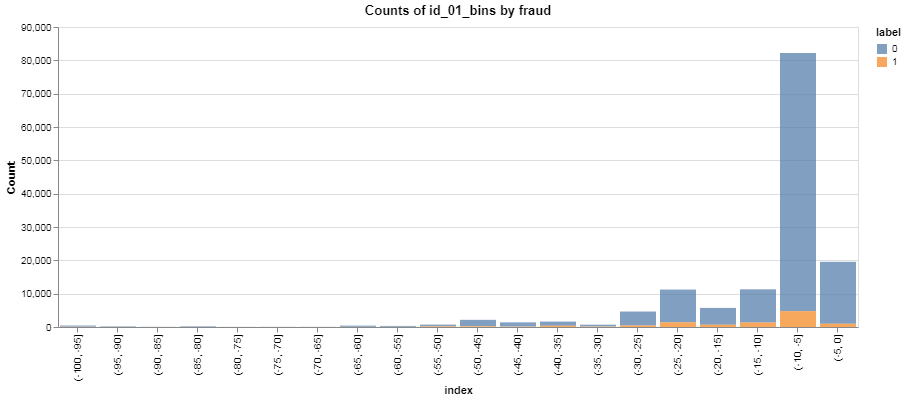

In [75]:
compare_bins_isfraud_hist(X, 'id_01_bins', width=800)#.interactive()

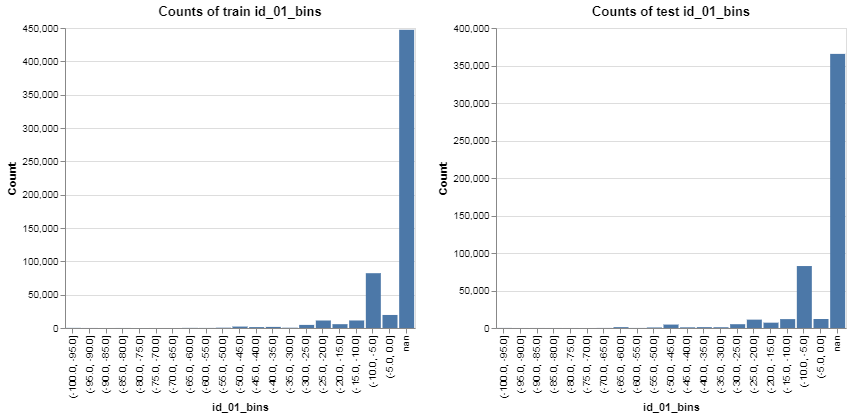

In [46]:
compare_bins_train_test_hist(X, X_test, 'id_01_bins', width=350)

#### id_02

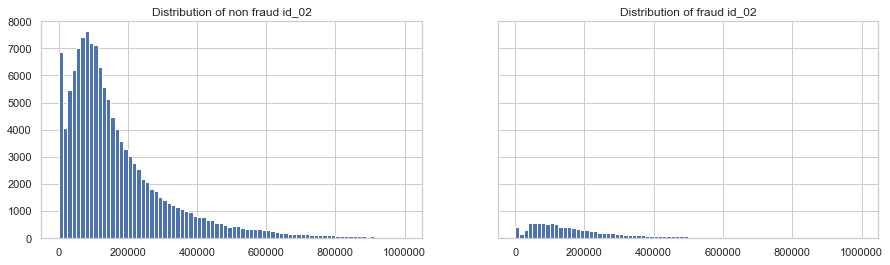

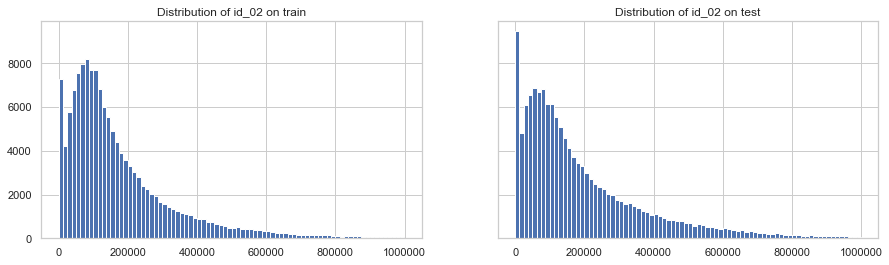

In [13]:
compare_isfraud_hist(X, 'id_02', 80)
compare_train_test_hist(X, X_test, 'id_02', 80)

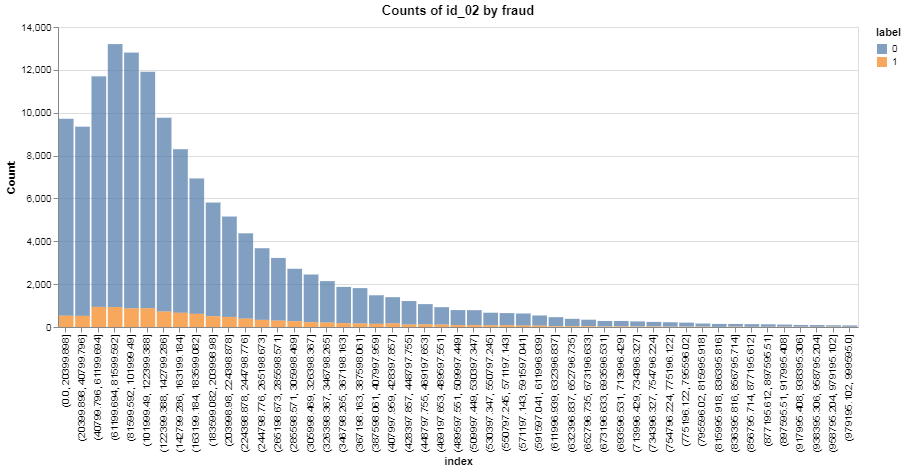

In [81]:
auto_bin(X, 'id_02', 50)#.interactive()

**There's a skew, let's log this thing :)**

In [84]:
X['id_02_log']=np.log(X['id_02'])
X_test['id_02_log']=np.log(X_test['id_02'])

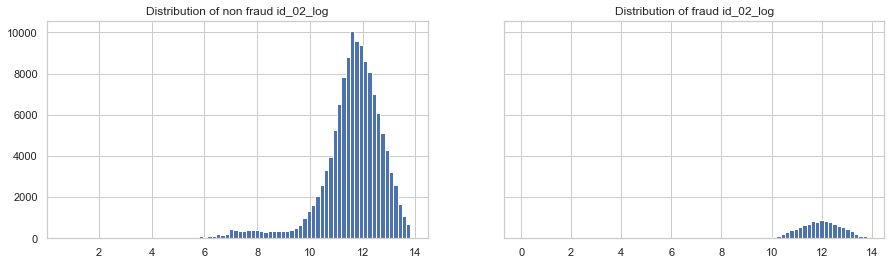

In [15]:
compare_isfraud_hist(X, 'id_02_log', 80)

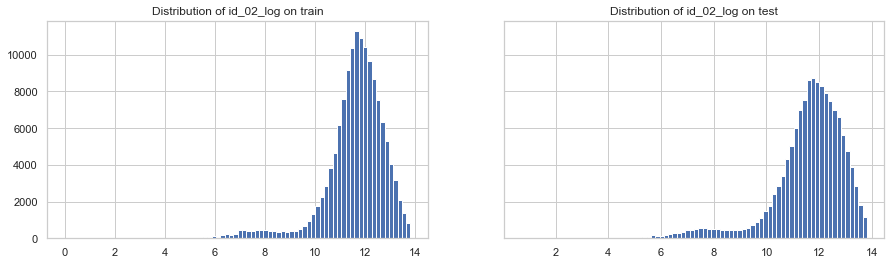

In [16]:
compare_train_test_hist(X, X_test, 'id_02_log', 80)

#### id_03

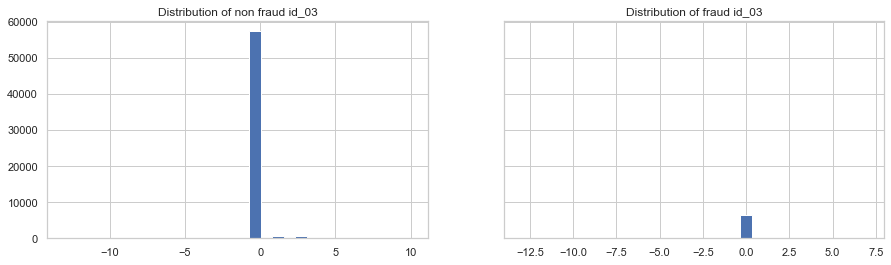

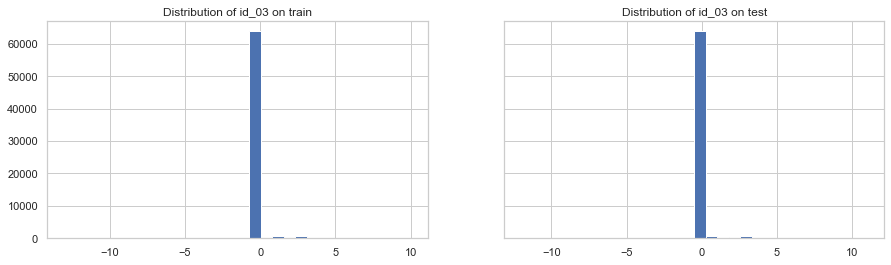

In [17]:
compare_isfraud_hist(X, 'id_03', 30)
compare_train_test_hist(X, X_test, 'id_03', 30)

#### id_04

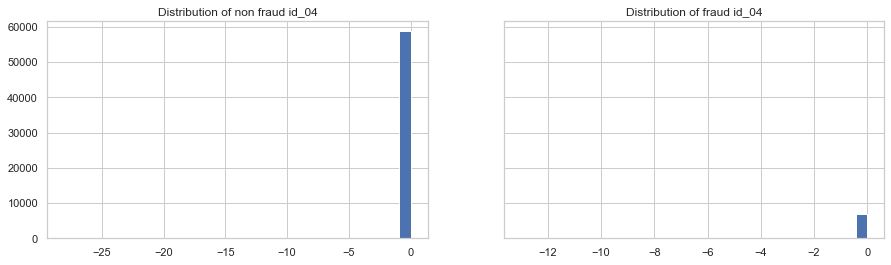

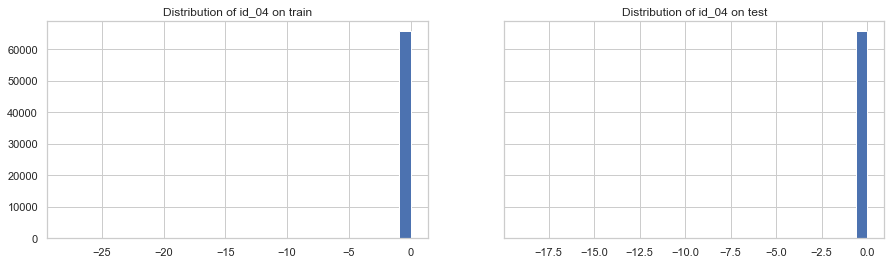

In [74]:
compare_isfraud_hist(X, 'id_04', 30)
compare_train_test_hist(X, X_test, 'id_04', 30)

#### id_05

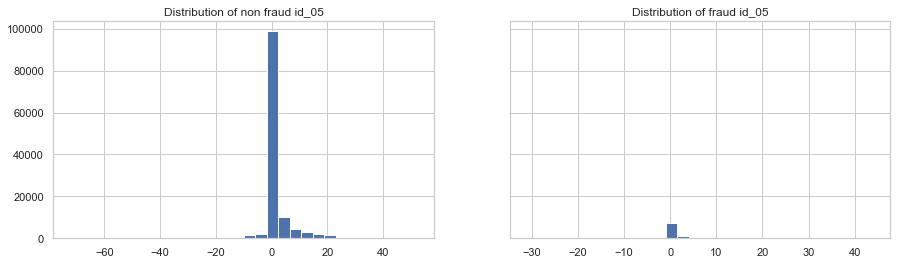

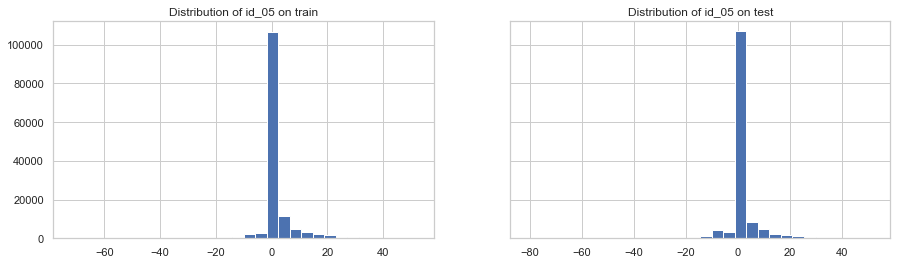

In [73]:
compare_isfraud_hist(X, 'id_05', 30)
compare_train_test_hist(X, X_test, 'id_05', 30)

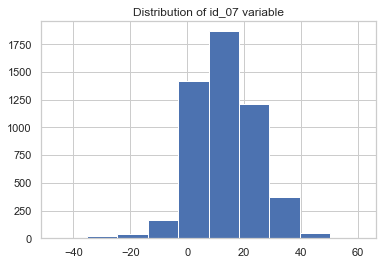

In [19]:
plt.hist(ds.X_train['id_07']);
plt.title('Distribution of id_07 variable');

#### id_12 --> id_38 : all categorical

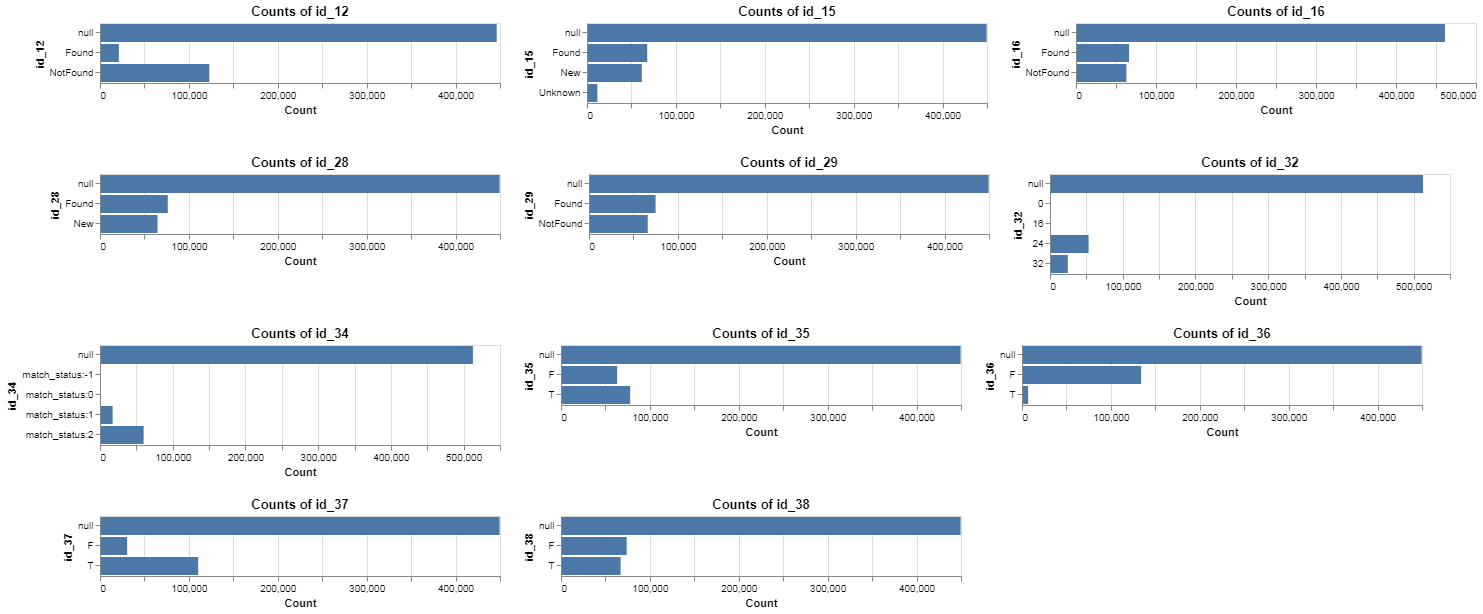

In [20]:
charts = {}

for i in ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']:
    chart = categorical_horizontal_histogram(X, i)
    charts[i] = chart   

(charts['id_12'] | charts['id_15'] | charts['id_16']) & (charts['id_28'] | charts['id_29'] | charts['id_32']) & (charts['id_34'] | charts['id_35'] | charts['id_36']) & (charts['id_37'] | charts['id_38'])

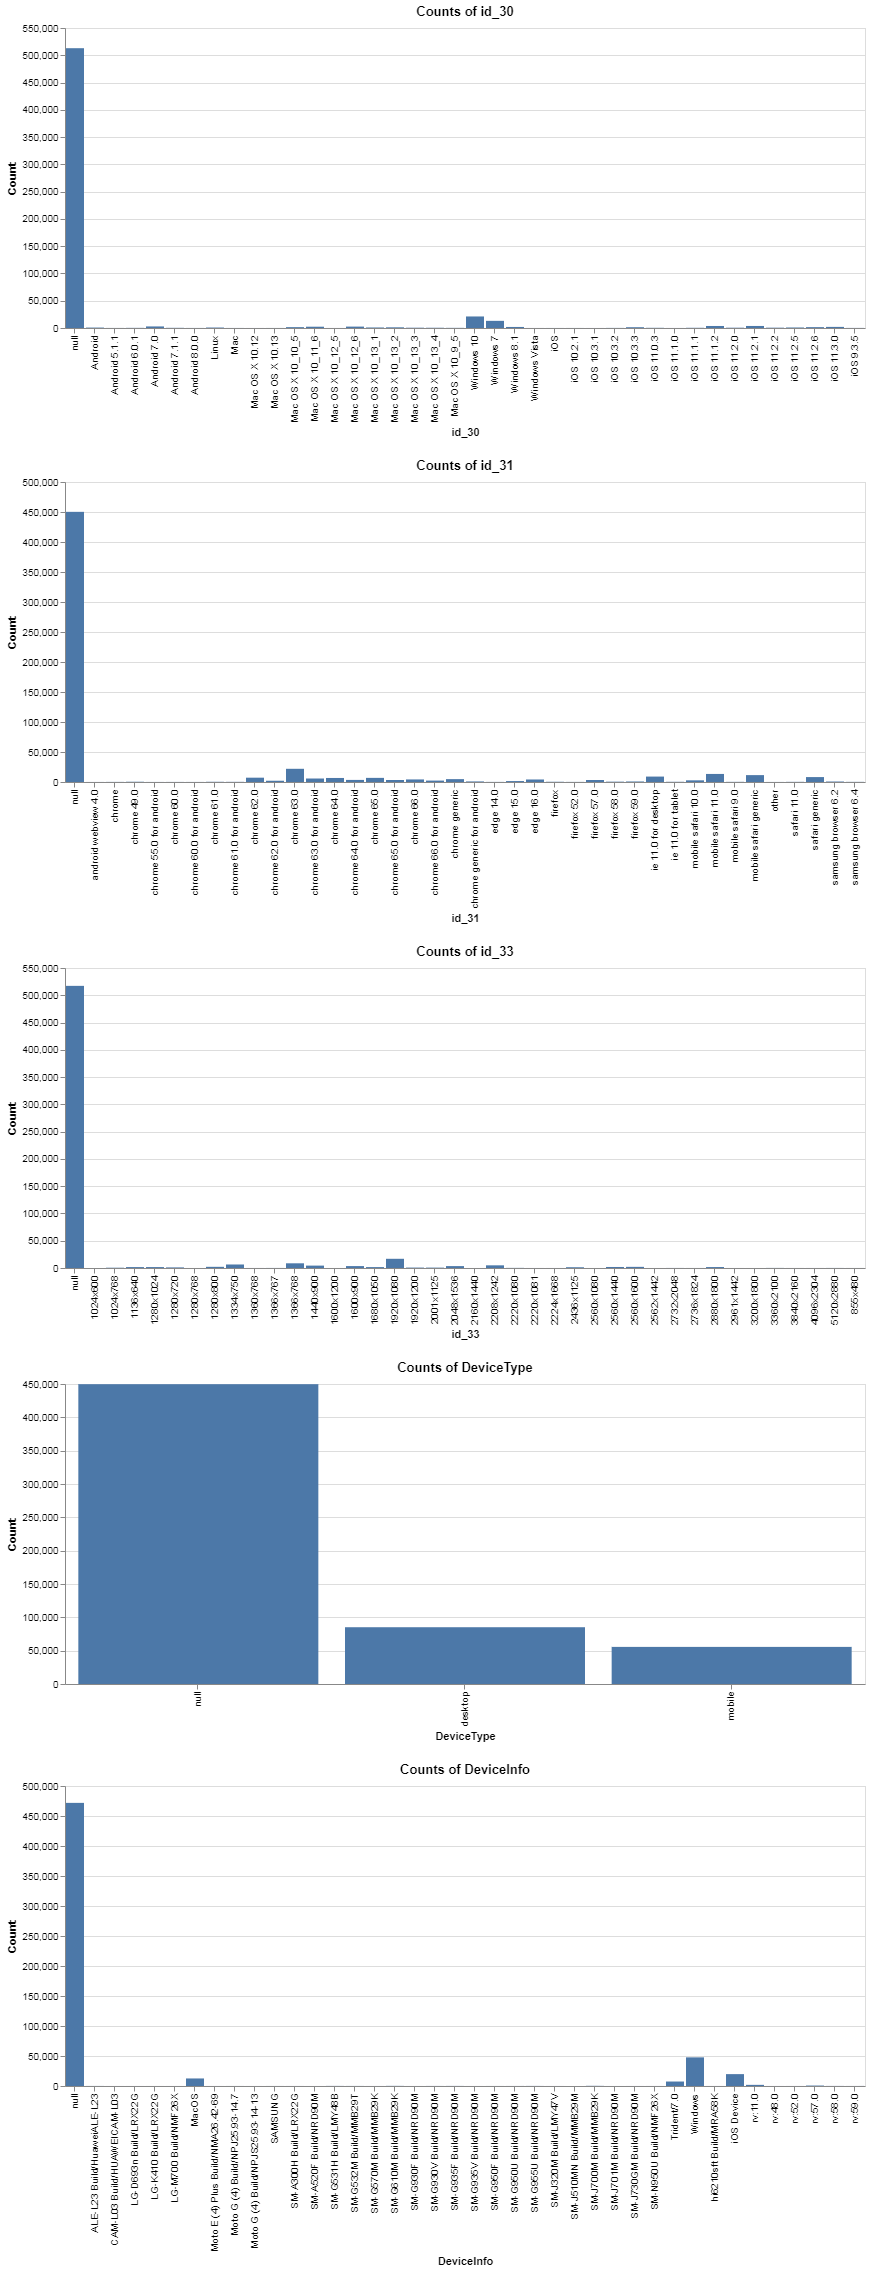

In [21]:
charts = {}
for i in ['id_30', 'id_31', 'id_33', 'DeviceType', 'DeviceInfo']:
    feature_count = ds.X_train[i].value_counts(dropna=False)[:40].reset_index().rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                x=alt.X(f"{i}:N", axis=alt.Axis(title=i)),
                y=alt.Y('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=800)
    charts[i] = chart
    
charts['id_30'] & charts['id_31'] & charts['id_33'] & charts['DeviceType'] & charts['DeviceInfo']

## TransactionDT

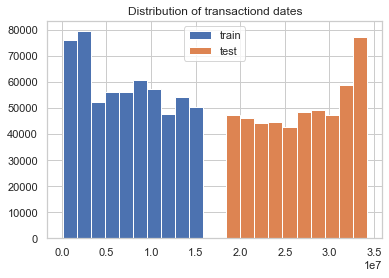

In [22]:
plt.hist(ds.X_train['TransactionDT'], label='train');
plt.hist(ds.X_test['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

In [23]:
charts = {}
for i in ['ProductCD', 'card4', 'card6', 'M4', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']:
    horizontal_histogram(ds.X_train, i)
    charts[i] = chart                         
    
(charts['ProductCD'] | charts['card4']) & (charts['card6'] | charts['M4']) & (charts['card6'] | charts['M4']) & (charts['M1'] | charts['M2']) & (charts['M3'] | charts['M5']) & (charts['M6'] | charts['M7']) & (charts['M8'] | charts['M9'])

NameError: name 'horizontal_histogram' is not defined

In [ ]:
charts = {}
for i in ['P_emaildomain', 'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2']:
    feature_count = ds.X_train[i].value_counts(dropna=False).reset_index()[:40].rename(columns={i: 'count', 'index': i})
    chart = alt.Chart(feature_count).mark_bar().encode(
                x=alt.X(f"{i}:N", axis=alt.Axis(title=i)),
                y=alt.Y('count:Q', axis=alt.Axis(title='Count')),
                tooltip=[i, 'count']
            ).properties(title=f"Counts of {i}", width=600)
    charts[i] = chart
    
(charts['P_emaildomain'] | charts['R_emaildomain']) & (charts['card1'] | charts['card2']) & (charts['card3'] | charts['card5']) & (charts['addr1'] | charts['addr2'])